# Board Game Geek Story Telling

Board games has always been a hobby of mine.  I wanted to see if I could see what makes a board game popular.  To do this I went to Board Game Geek website.

Board Game Geek is the largest site of board game data on the internet.  It has a ton of information about thousands of board games.  Data points like year of publication, min and max players, theme, designer etc.

I obtained the data from kaggle.com in the following link:
https://www.kaggle.com/mrpantherson/board-game-data

#### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../data/bgg_clean.csv') # df = pd.read_csv('/..data/bgg_clean.csv')

In [3]:
df.head(5)

,game_id,names,min_players,max_players,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
0,174430,Gloomhaven,1,4,60,120,2017,8.98893,8.61858,15376,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543
1,161936,Pandemic Legacy: Season 1,2,4,60,60,2015,8.66140,8.50163,26063,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210
2,182028,Through the Ages: A New Story of Civilization,2,4,180,240,2015,8.60673,8.30183,12352,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3678
3,167791,Terraforming Mars,1,5,120,120,2016,8.38461,8.19914,26004,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456
4,12333,Twilight Struggle,2,2,120,180,2005,8.33954,8.19787,31301,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4582 entries, 0 to 4581
Data columns (total 16 columns):
game_id        4582 non-null int64
names          4582 non-null object
min_players    4582 non-null int64
max_players    4582 non-null int64
min_time       4582 non-null int64
max_time       4582 non-null int64
year           4582 non-null int64
avg_rating     4582 non-null float64
geek_rating    4582 non-null float64
num_votes      4582 non-null int64
age            4582 non-null int64
mechanic       4582 non-null object
owned          4582 non-null int64
category       4582 non-null object
designer       4582 non-null object
weight         4582 non-null float64
dtypes: float64(3), int64(9), object(4)
memory usage: 572.9+ KB


In [5]:
df.describe()

,game_id,min_players,max_players,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000,4582.000000
mean,90411.369053,1.999564,4.453950,70.623527,83.272588,2007.781318,6.956950,6.103448,2086.136622,10.503055,3154.554998,2.346587
std,76869.496570,0.605944,1.764068,71.313702,77.554491,9.262700,0.550253,0.491535,4889.059717,3.085745,6655.475060,0.784864
min,1.000000,1.000000,1.000000,1.000000,2.000000,1974.000000,5.792010,5.640240,62.000000,0.000000,49.000000,0.000000
25%,12761.750000,2.000000,4.000000,30.000000,30.000000,2004.000000,6.537757,5.730867,303.000000,9.000000,645.000000,1.757400
50%,75989.000000,2.000000,4.000000,45.000000,60.000000,2011.000000,6.899250,5.920185,655.000000,12.000000,1245.000000,2.296300
75%,160710.500000,2.000000,5.000000,90.000000,100.000000,2015.000000,7.325515,6.322707,1697.500000,12.000000,2828.750000,2.879325
max,248949.000000,5.000000,10.000000,480.000000,480.000000,2018.000000,9.159150,8.618580,77423.000000,42.000000,111807.000000,4.729700


#### Ratings

There are two different ratings in the data.  

One is avg_rating thatis the average of all ratings from registered BGG users that the game has recieved, calculated by adding up all individual ratings.  

The second is geek_rating that the rank column is based on.  It is based on the avg_rating but the number is altered by BGG using an algorithm and beysian statistics to prevent games with relatively few votes climbing up to the top of the BGG ranting.

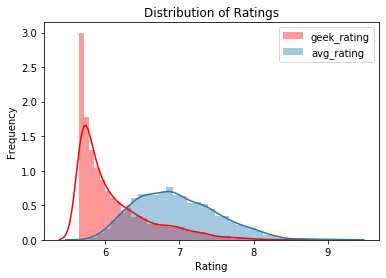

In [6]:
sns.distplot(df['geek_rating'], color='r', label='geek_rating')
sns.distplot(df['avg_rating'], label='avg_rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.legend();

Looking at the distribution of the two ratings we see taht the geek_rating is skewed towards the left.  This makes sence since the geek_rating is a ranking system that BGG uses.  The avg_rating has much more of a normalized distribution.

#### Player Count

An important part of any board game is how many people can play.  There are 2 different columns that describes this: min_players and max_players.  

In [7]:
df['player_range'] = df['min_players'].astype(str) + '-' + df['max_players'].astype(str)

player_range_count = df['player_range'].value_counts()
player_range_count_50 = player_range_count[player_range_count > 50]

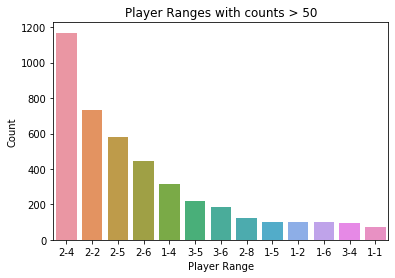

In [8]:
sns.barplot(x=player_range_count_50.index, y=player_range_count_50)
plt.xlabel('Player Range')
plt.ylabel('Count')
plt.title('Player Ranges with counts > 50');

I added a new column by combining the min and max players to form a player range.  We see that the most popular player ranges is 2-4 players with 2-2 player games as the suprise. I don't play a lot of 2-2 player games but they are popular to make.

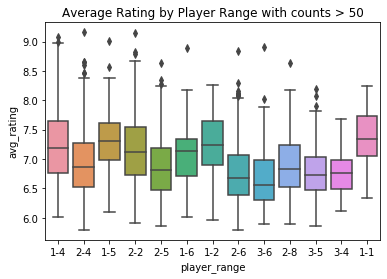

In [9]:
df_player_range_50 = df.loc[df['player_range'].isin(player_range_count_50.index)]

sns.boxplot(x=df_player_range_50['player_range'], y=df_player_range_50['avg_rating'])
plt.title('Average Rating by Player Range with counts > 50');

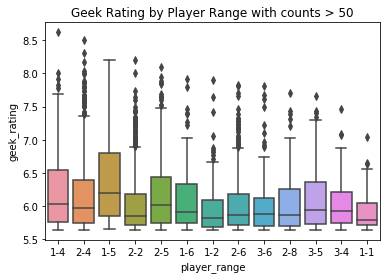

In [10]:
sns.boxplot(x=df_player_range_50['player_range'], y=df_player_range_50['geek_rating'])
plt.title('Geek Rating by Player Range with counts > 50');

Looking at the box plots of the average rating we see that 1-1 player games are the best rated but also have the fewest board games with 50 or more counts.  2-4 player games which have the greatest amount have a wide range of ratings.

#### Time

Time is the ultimate currancy for a board game.  Are we going to spend all night to play one board game or are we going to play lots of shorter games to maximize the amount of exposure.

In [11]:
df['time_range'] = df['min_time'].astype(str) + '-' + df['max_time'].astype(str)

time_range_count = df['time_range'].value_counts()
time_range_count_50 = time_range_count[time_range_count > 50]

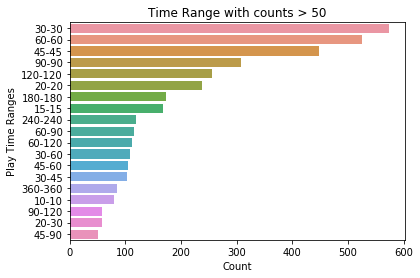

In [12]:
sns.barplot(x=time_range_count_50, y=time_range_count_50.index)
plt.xlabel('Count')
plt.ylabel('Play Time Ranges')
plt.title('Time Range with counts > 50');

Looking at the Play time ranges we see that most games are less then 2 hours.  Also a lot of the games have the same min_time and max_time.

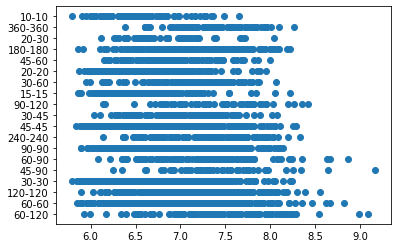

In [13]:
df_time_range_50 = df.loc[df['time_range'].isin(time_range_count_50.index)]

plt.scatter(x=df_time_range_50['avg_rating'], y=df_time_range_50['time_range']);

#### Weight or Game Complexity and Age

The weight column has an average rating by users on how complex a game is.  It is a scale from 0-5.  We need to keep in mind that BGG is user driven data and that the data might be scewed towards people who are involved in hobby.  The hobbyist might not think a game is complex and rate is lower.  But we will take the weight as a good measure.

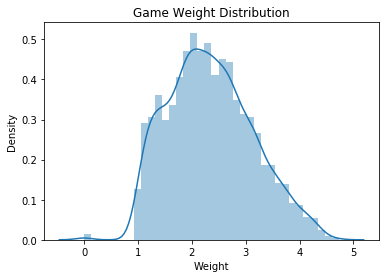

In [14]:
sns.distplot(df['weight'])
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Game Weight Distribution');

We see that the weight distribution seems to be a normal distribution skewed a little to the left.

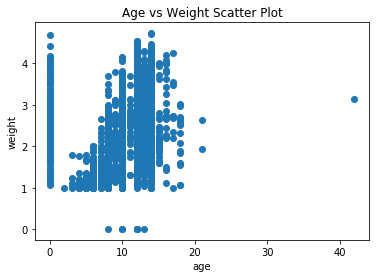

In [15]:
plt.scatter(x=df['age'], y=df['weight'])
plt.xlabel('age')
plt.ylabel('weight')
plt.title('Age vs Weight Scatter Plot');

In [16]:
age_mean = df['age'].mean()
df = df.replace({'age': {0: age_mean}})

Looking at the relationship between age and weight we see that there are a lot of games that have a age of 0 but have a wide rage of weight.  This is wierd.  Babies will not understand a game with complexity over 4.  I think these are missing values.  We will replace all 0 in the age column with the mean of the age column

#### Owned and Number of Votes

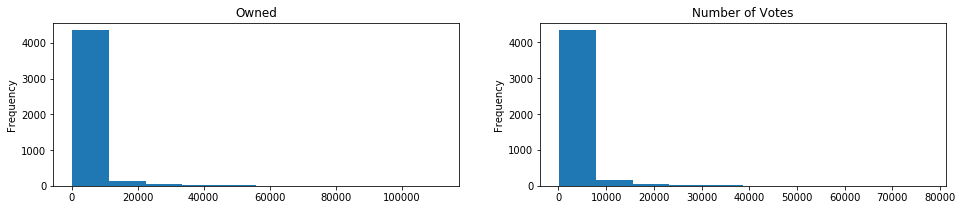

In [17]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
df['owned'].plot.hist(ax=axes[0], title='Owned')
df['num_votes'].plot.hist(ax=axes[1], title='Number of Votes');

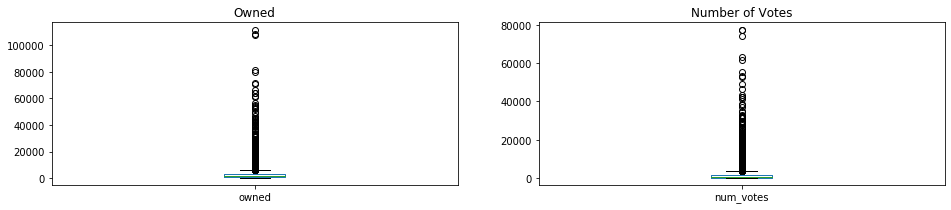

In [18]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
df['owned'].plot.box(ax=axes[0], title='Owned')
df['num_votes'].plot.box(ax=axes[1], title='Number of Votes');

In [19]:
df[['owned', 'num_votes']].corr()

,owned,num_votes
owned,1.000000,0.985139
num_votes,0.985139,1.000000


Looking at the games that are owned we see it is the same shape as num_votes.  There is probably a strong corrilation between the two.  This makes sence because people vote on the games they own.

#### Find the most used Mechanics in board games

In [20]:
# create dummie columns from columns with lists
def dummie(column, game_id):
    # create a new dataframe from the column series with game_id as the index
    new_df = pd.DataFrame(column.str.split(', ').tolist(), index=game_id).stack()
    # reset the index
    new_df = new_df.reset_index([0, 'game_id'])
    # convert categorical variable into dummy variables
    new_df = pd.get_dummies(new_df)
    # sum and get rid of duplicate rows
    new_df = new_df.groupby(['game_id']).sum().reset_index()
    # Take 0_ out of each column name
    new_df.rename(columns=lambda x: x[2:], inplace=True)
    new_df.rename(columns={'me_id': 'game_id'}, inplace=True)
        
    return new_df

In [21]:
# create new df with attribute as row and counts a column
def sum_df_attributes(df):
    c = list(df.columns)
    d = {}
    for i in c:
        n = df[i].sum()
        d[i] = n
    df_sum = pd.DataFrame.from_dict(d, orient='index')
    df_sum.columns = ['Counts']
    df_sum = df_sum.drop('game_id')
    
    return df_sum

In [22]:
dfm = dummie(df['mechanic'], df['game_id'])
dfm_sum = sum_df_attributes(dfm)
print("Number of different Mechanics: ", dfm_sum.shape[0])
dfm_sum.sort_values('Counts', ascending=False)

Number of different Mechanics:  52


,Counts
Hand Management,1325
Dice Rolling,1303
Variable Player Powers,859
Set Collection,748
Area Control / Area Influence,636
Card Drafting,609
Modular Board,553
Tile Placement,522
Action Point Allowance System,383
Hex-and-Counter,368


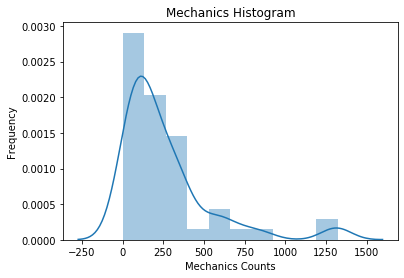

In [23]:
sns.distplot(dfm_sum['Counts'])
plt.xlabel('Mechanics Counts')
plt.ylabel('Frequency')
plt.title('Mechanics Histogram');

We can see that there are 52 different Mechanics.  We will see if we can combine some of them

In [24]:
dfm_col_250 = dfm_sum[dfm_sum['Counts'] < 250]

dfm_col_250_index_list = dfm_col_250.index.to_list()

dfm['other_mechanic'] = 0

for c in dfm_col_250_index_list:
    dfm['other_mechanic'] = dfm['other_mechanic'] + dfm[c]
    dfm = dfm.drop(c, axis=1)

We combined all mechanics of board games of 250 or less into a column of other_mechanic

#### Find the most used Category in board games

In [25]:
dfc = dummie(df['category'], df['game_id'])
dfc_sum = sum_df_attributes(dfc)
dfc_sum.sort_values('Counts', ascending=False).head(10)

,Counts
Card Game,1297
Wargame,787
Fantasy,723
Economic,549
Fighting,513
Science Fiction,447
Dice,327
Medieval,323
Adventure,309
Bluffing,303


In [26]:
dfc_columns = dfc.columns.to_list()
war_list = []
for c in dfc_columns:
    if 'War' in c:
        war_list.append(c)

In [27]:
dfc['combined_war'] = 0

for c in war_list:
    dfc['combined_war'] = dfc['combined_war'] + dfc[c]
    dfc = dfc.drop(c, axis=1)

In [28]:
dfc_sum = sum_df_attributes(dfc)
dfc_sum.sort_values('Counts', ascending=False).head(10)

,Counts
combined_war,1301
Card Game,1297
Fantasy,723
Economic,549
Fighting,513
Science Fiction,447
Dice,327
Medieval,323
Adventure,309
Bluffing,303


In [29]:
dfc_col_250 = dfc_sum[dfc_sum['Counts'] < 200]

dfc_col_250_index_list = dfc_col_250.index.to_list()

dfc['other_category'] = 0

for c in dfc_col_250_index_list:
    dfc['other_category'] = dfc['other_category'] + dfc[c]
    dfc = dfc.drop(c, axis=1)

In [30]:
dfc_sum = sum_df_attributes(dfc)
dfc_sum.sort_values('Counts', ascending=False).head(10)

,Counts
other_category,4590
combined_war,1301
Card Game,1297
Fantasy,723
Economic,549
Fighting,513
Science Fiction,447
Dice,327
Medieval,323
Adventure,309


#### Find the Designer who has created the most games

In [31]:
dfd = dummie(df['designer'], df['game_id'])
dfd_sum = sum_df_attributes(dfd)
dfd_sum.sort_values('Counts', ascending=False).head(10)

,Counts
Reiner Knizia,119
Wolfgang Kramer,61
Martin Wallace,56
Bruno Cathala,44
Alan R. Moon,44
Klaus Teuber,39
Friedemann Friese,38
Eric M. Lang,37
Jr.,36
Michael Schacht,36


In [32]:
dfd_sum[dfd_sum['Counts'] < 10].shape[0] / dfd_sum['Counts'].shape[0]

0.9616576297443842

In [33]:
df_new = pd.merge(df, dfm, on='game_id')
df_new = pd.merge(df_new, dfc, on='game_id')

In [34]:
df_new = df_new.drop('designer', axis=1)
df_new = df_new.set_index('game_id')

Looking at the designers we see that 96% designers haven't made more then 10 games.  It seems that the designer category will have very little influence on predicting the rating of a game and will be dropped from the dataframe.

In [35]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

In [37]:
df_new.to_csv(r'../data/bgg_ml.csv')